In [86]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int

#pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [87]:
cd ..

/home/ck/pythonWorkspace


Comparison of FY and MSG data

In [165]:
file1 = '/home/ck/DIR/cornkle/data/emma_test/08/FY2G_CTT_POWER_NOM_20180805_1800.nc'
file2 = '/home/ck/DIR/cornkle/data/emma_test/coresPower_MFG_-40_700km2_-50points_dominant_1994_06.nc'

In [166]:
fy_ds = xr.open_dataset(file1)
msg_ds =xr.open_dataset(file2)

In [177]:
def draw_map(ax, t, lat, lon, title='', **kwargs):
    mapp = ax.contourf(lon, lat, t, transform=ccrs.PlateCarree(), extend='both', **kwargs)
    plt.title(title)
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.colorbar(mapp)

# Full FY domain - the three storms in the south west between 21-27N all have weird homogeneous CTT, the other clouds seem to be okay.
Power values for those three storms follow storm edges..

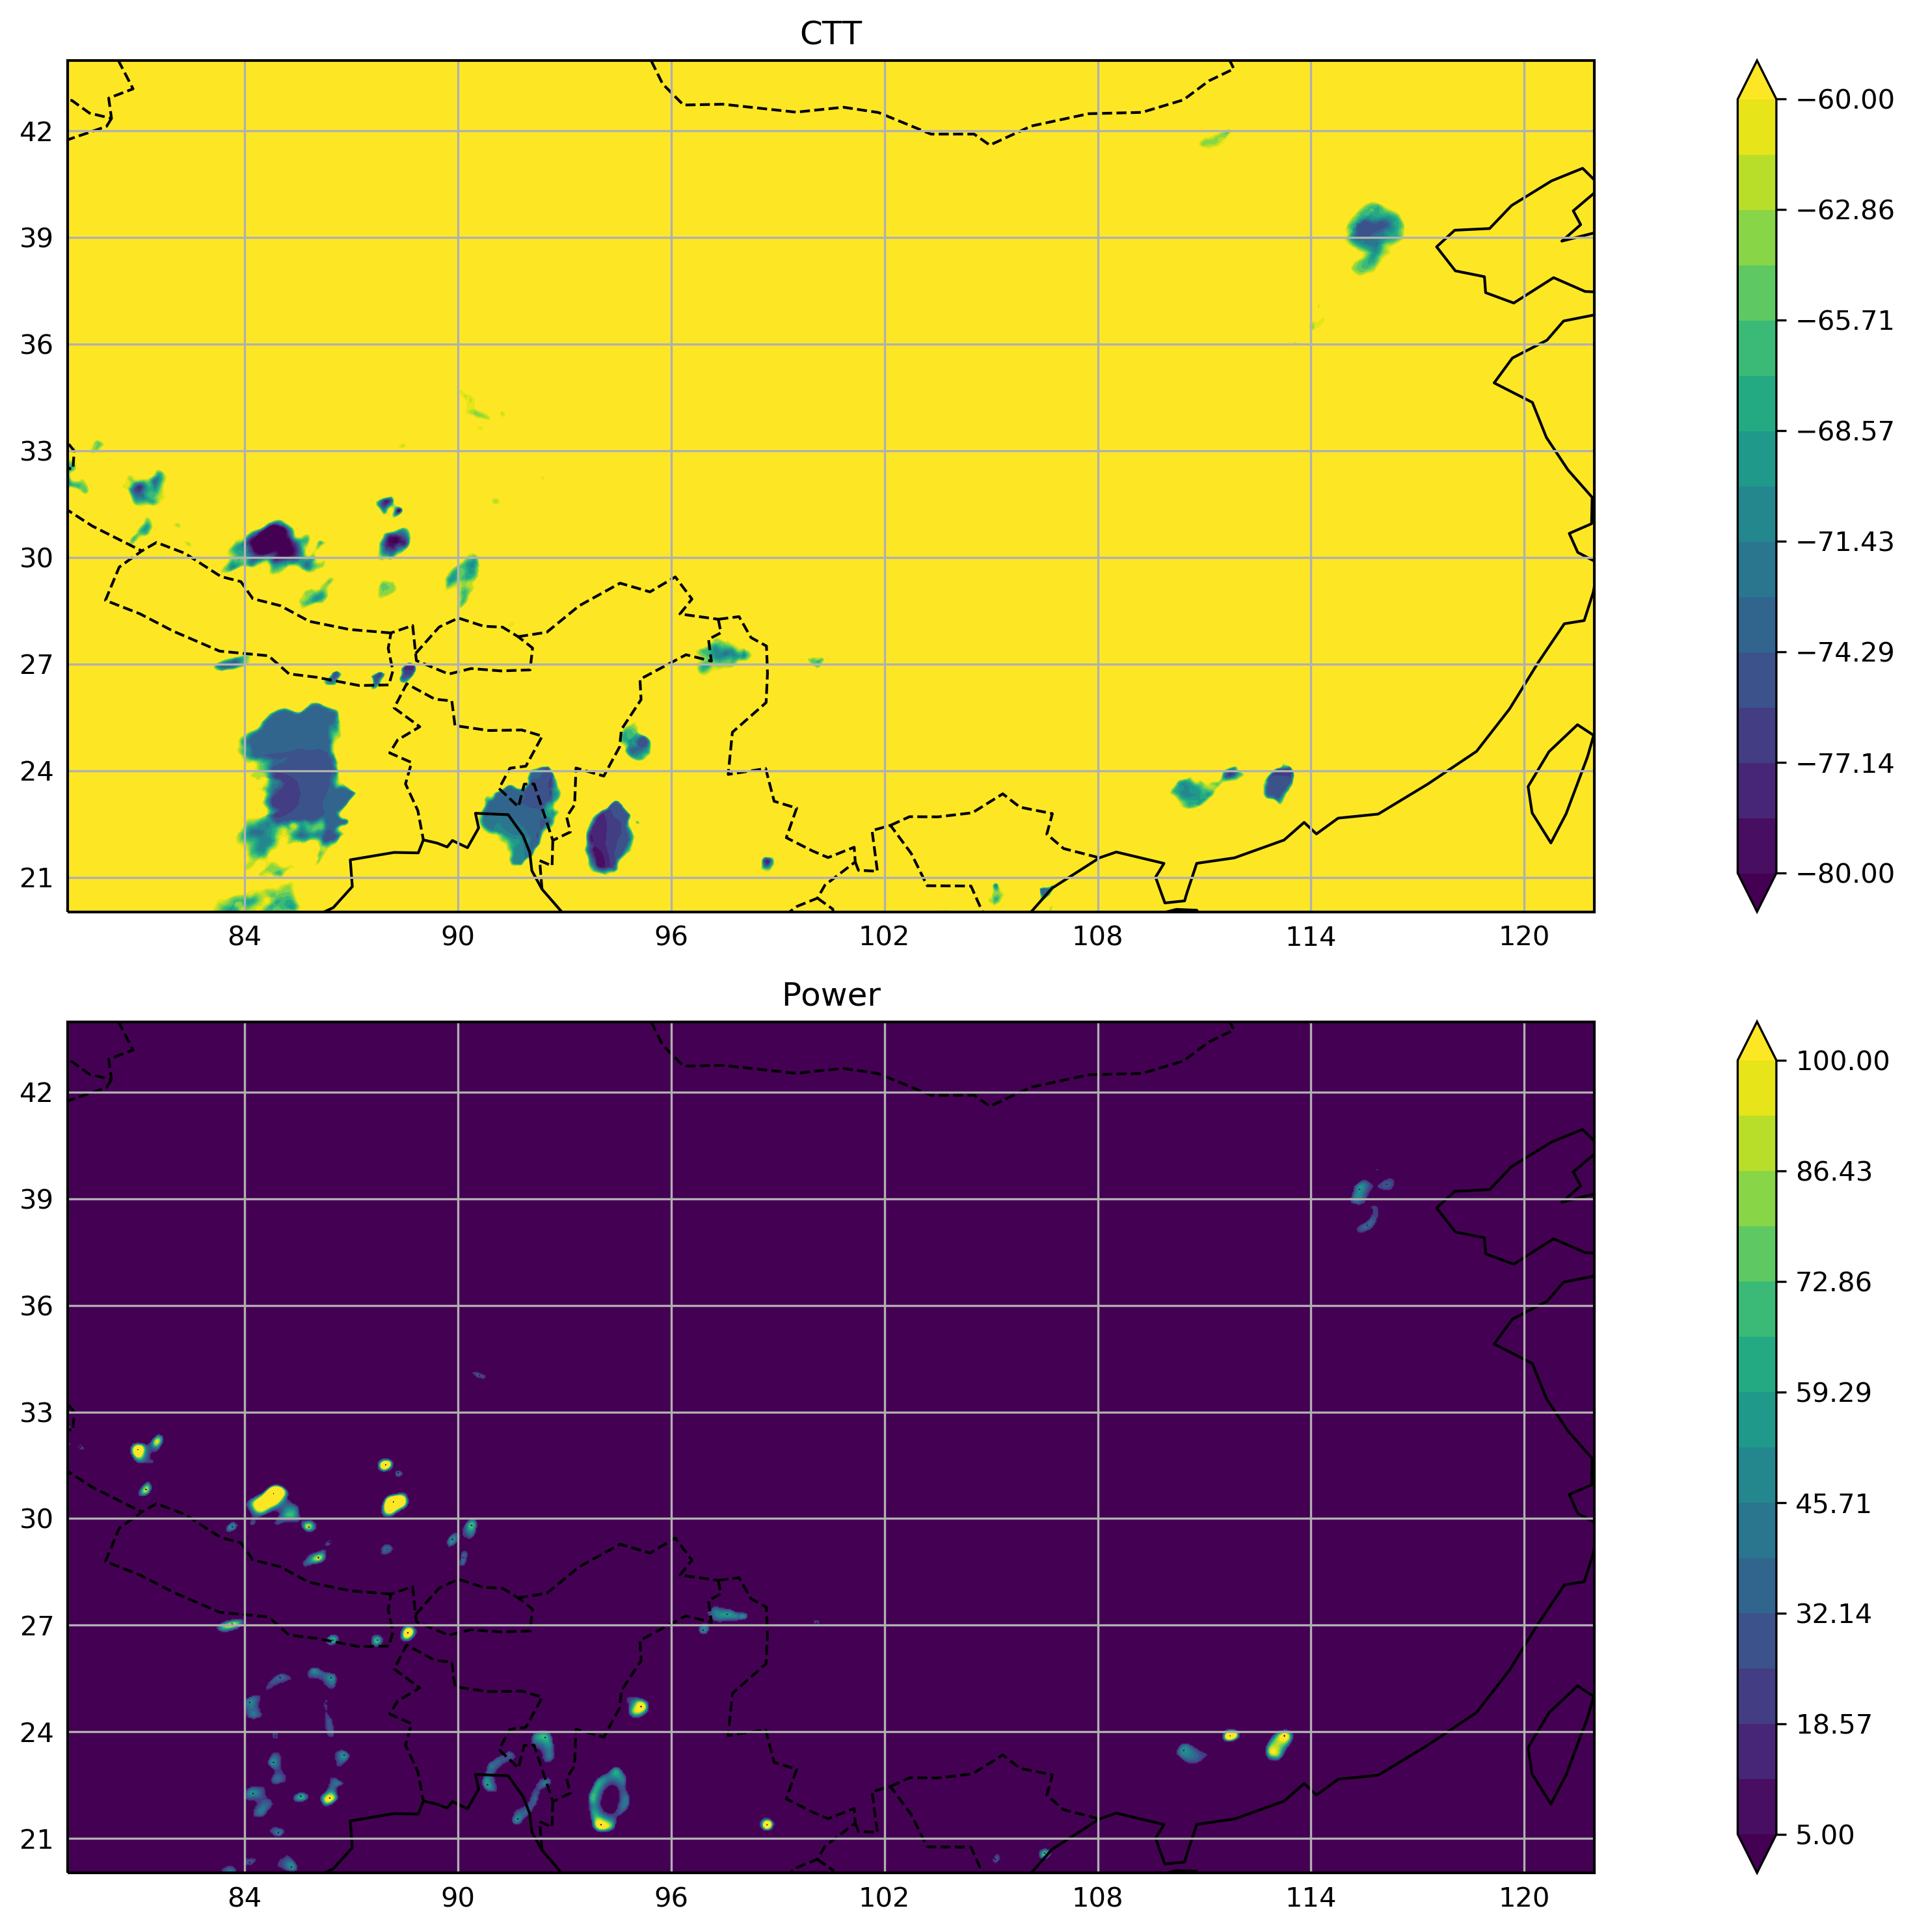

In [168]:
f=plt.figure(figsize=(15,10), dpi=300)
ax = f.add_subplot(211, projection=ccrs.PlateCarree())
draw_map(ax, fy_ds['CTT'].values/100, fy_ds['lat'], fy_ds['lon'], levels=np.linspace(-80,-60,15),
        title='CTT')
ax = f.add_subplot(212, projection=ccrs.PlateCarree())
draw_map(ax,fy_ds['blobs'].values, fy_ds['lat'], fy_ds['lon'], levels=np.linspace(5,100,15), 
         title='Power')
f.canvas.draw() 
plt.tight_layout()

# Closer look at storm in South-East: CTT (top) and power values (bottom) - seems to have smoothed artificial cloud structure

In [180]:
fy_cut = fy_ds.sel(lon=slice(84,87), lat=slice(21,26))

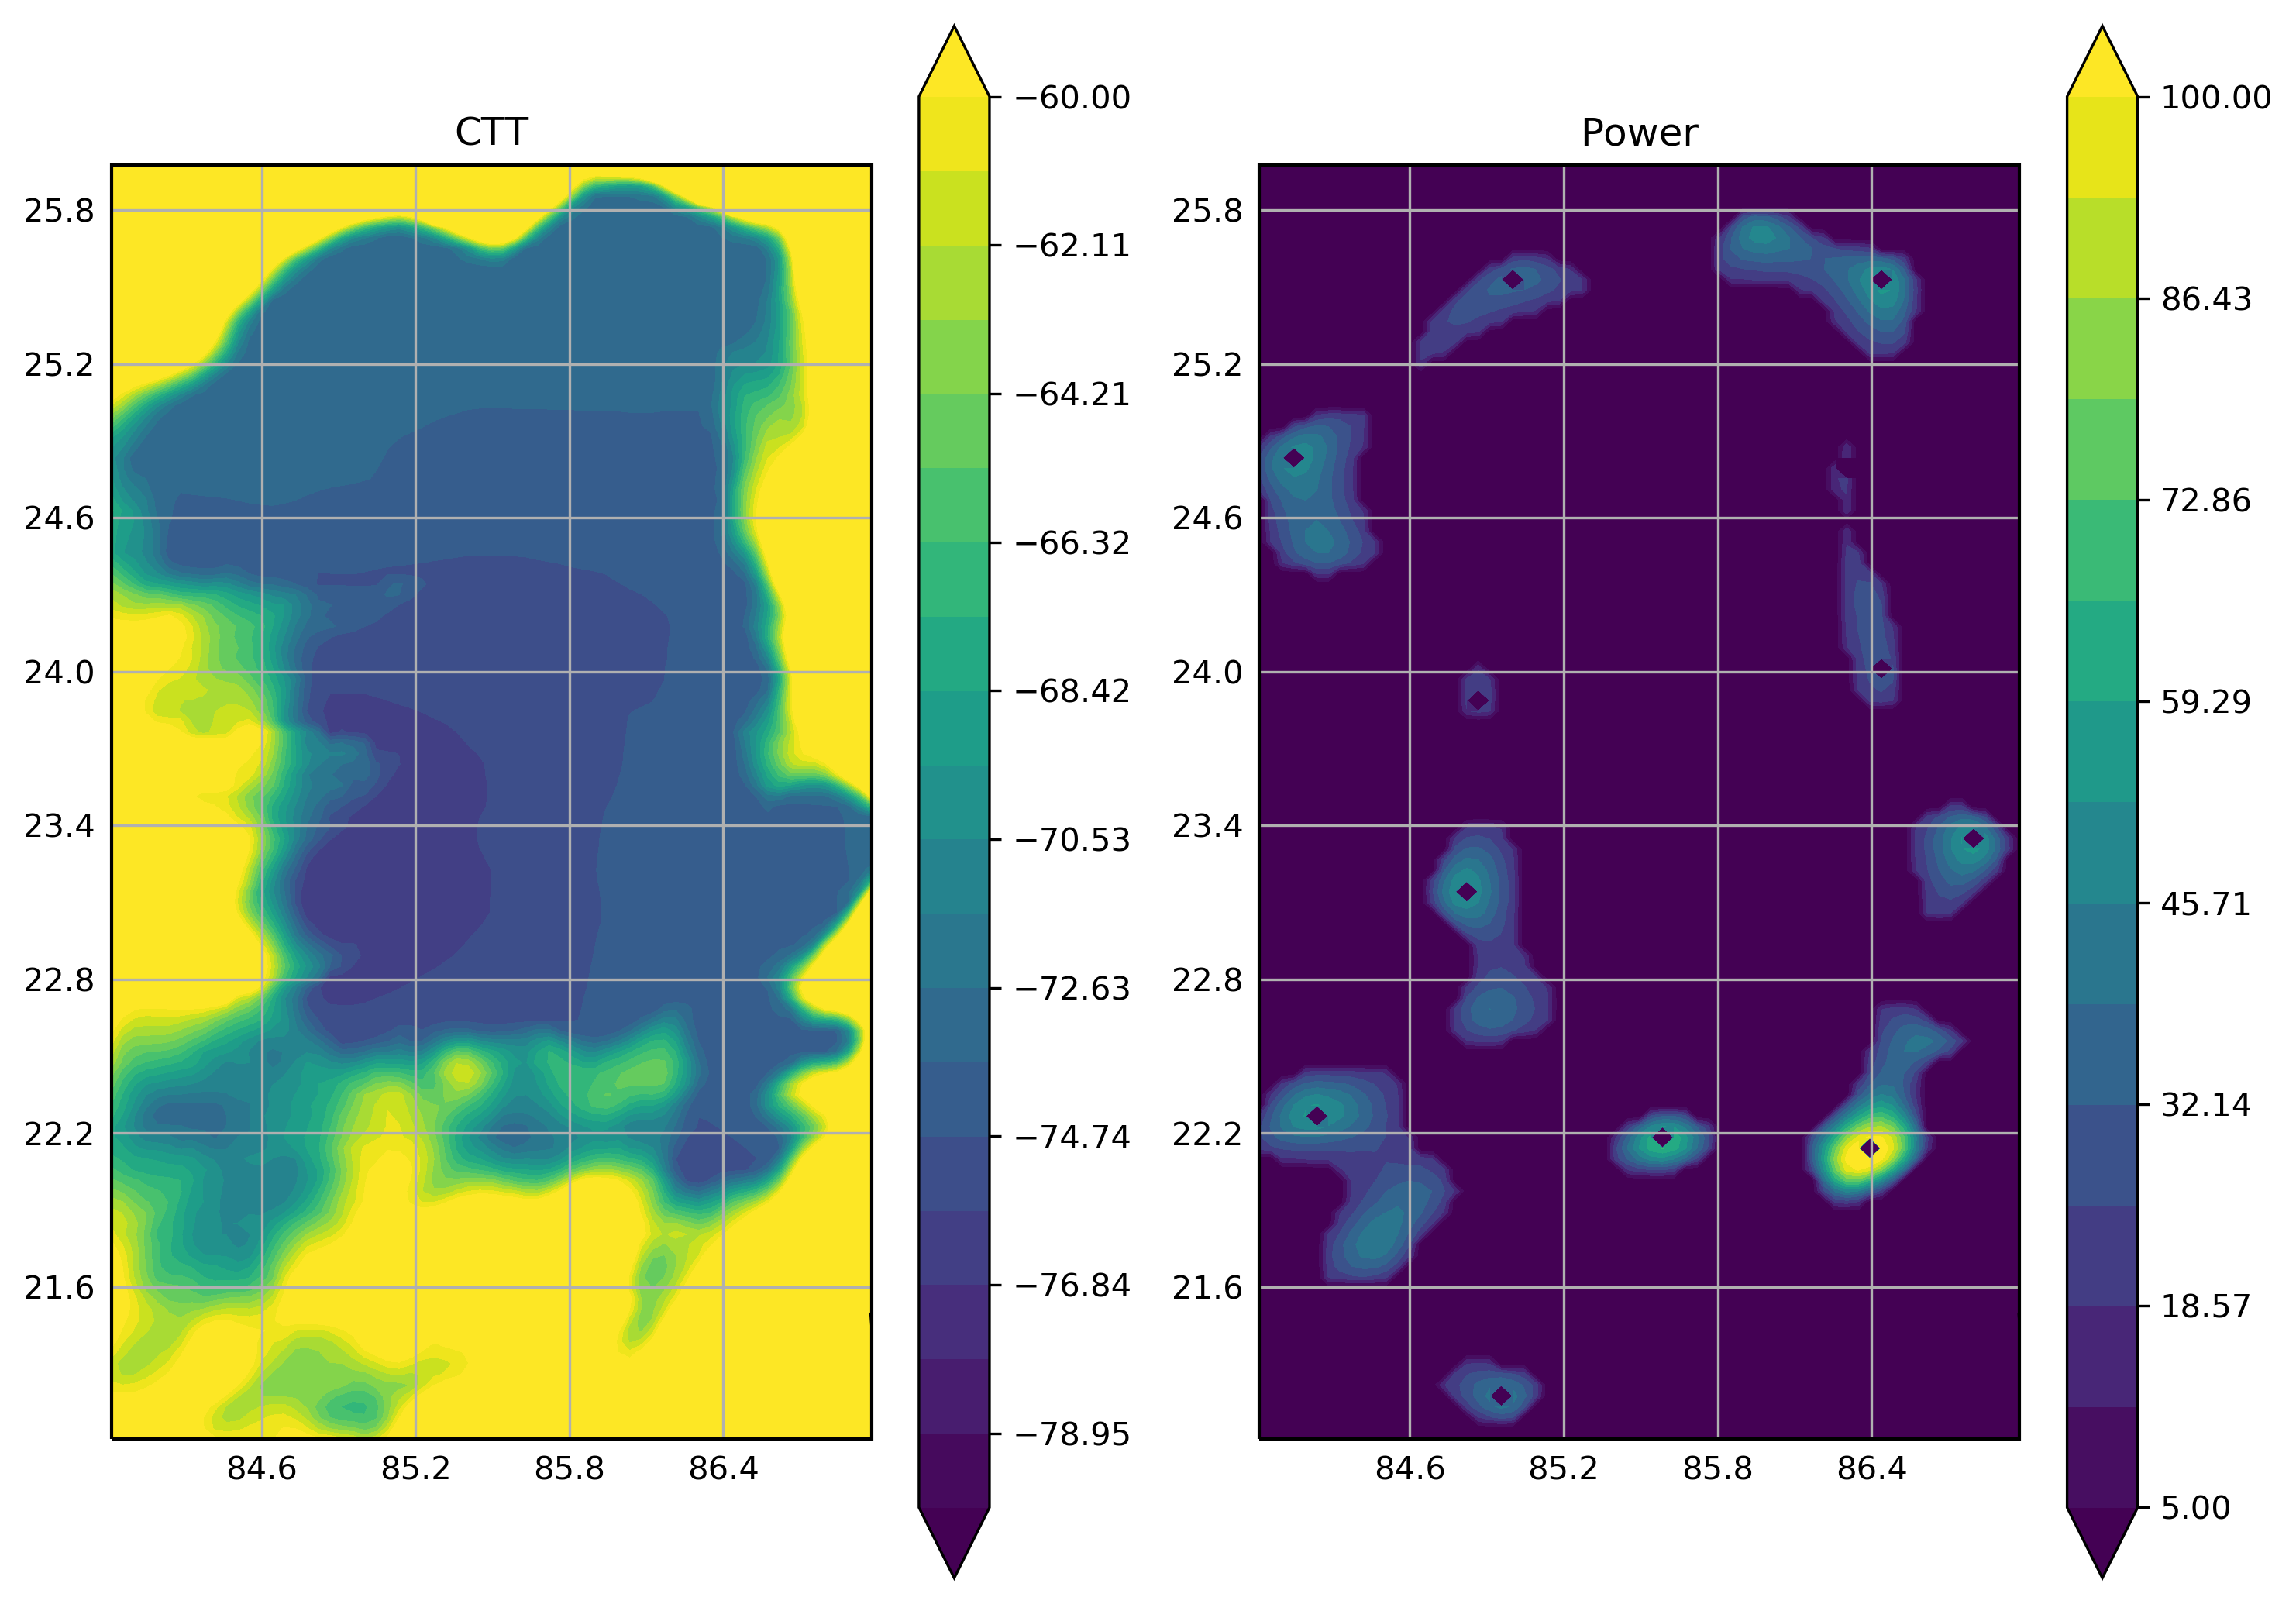

In [184]:
f=plt.figure(figsize=(10,7), dpi=300)
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
draw_map(ax, fy_cut['CTT'].values/100, fy_cut['lat'], fy_cut['lon'], levels=np.linspace(-80,-60,20),
        title='CTT')
ax = f.add_subplot(122, projection=ccrs.PlateCarree())
draw_map(ax,fy_cut['blobs'].values, fy_cut['lat'], fy_cut['lon'], levels=np.linspace(5,100,15), 
         title='Power')
f.canvas.draw() 
plt.tight_layout()

# Closer look at a storm to the north, which seems to have much more detail, see visible contour levels - missing detail only true for certain storms!

In [175]:
fy_cut = fy_ds.sel(lon=slice(80,86), lat=slice(29,33))

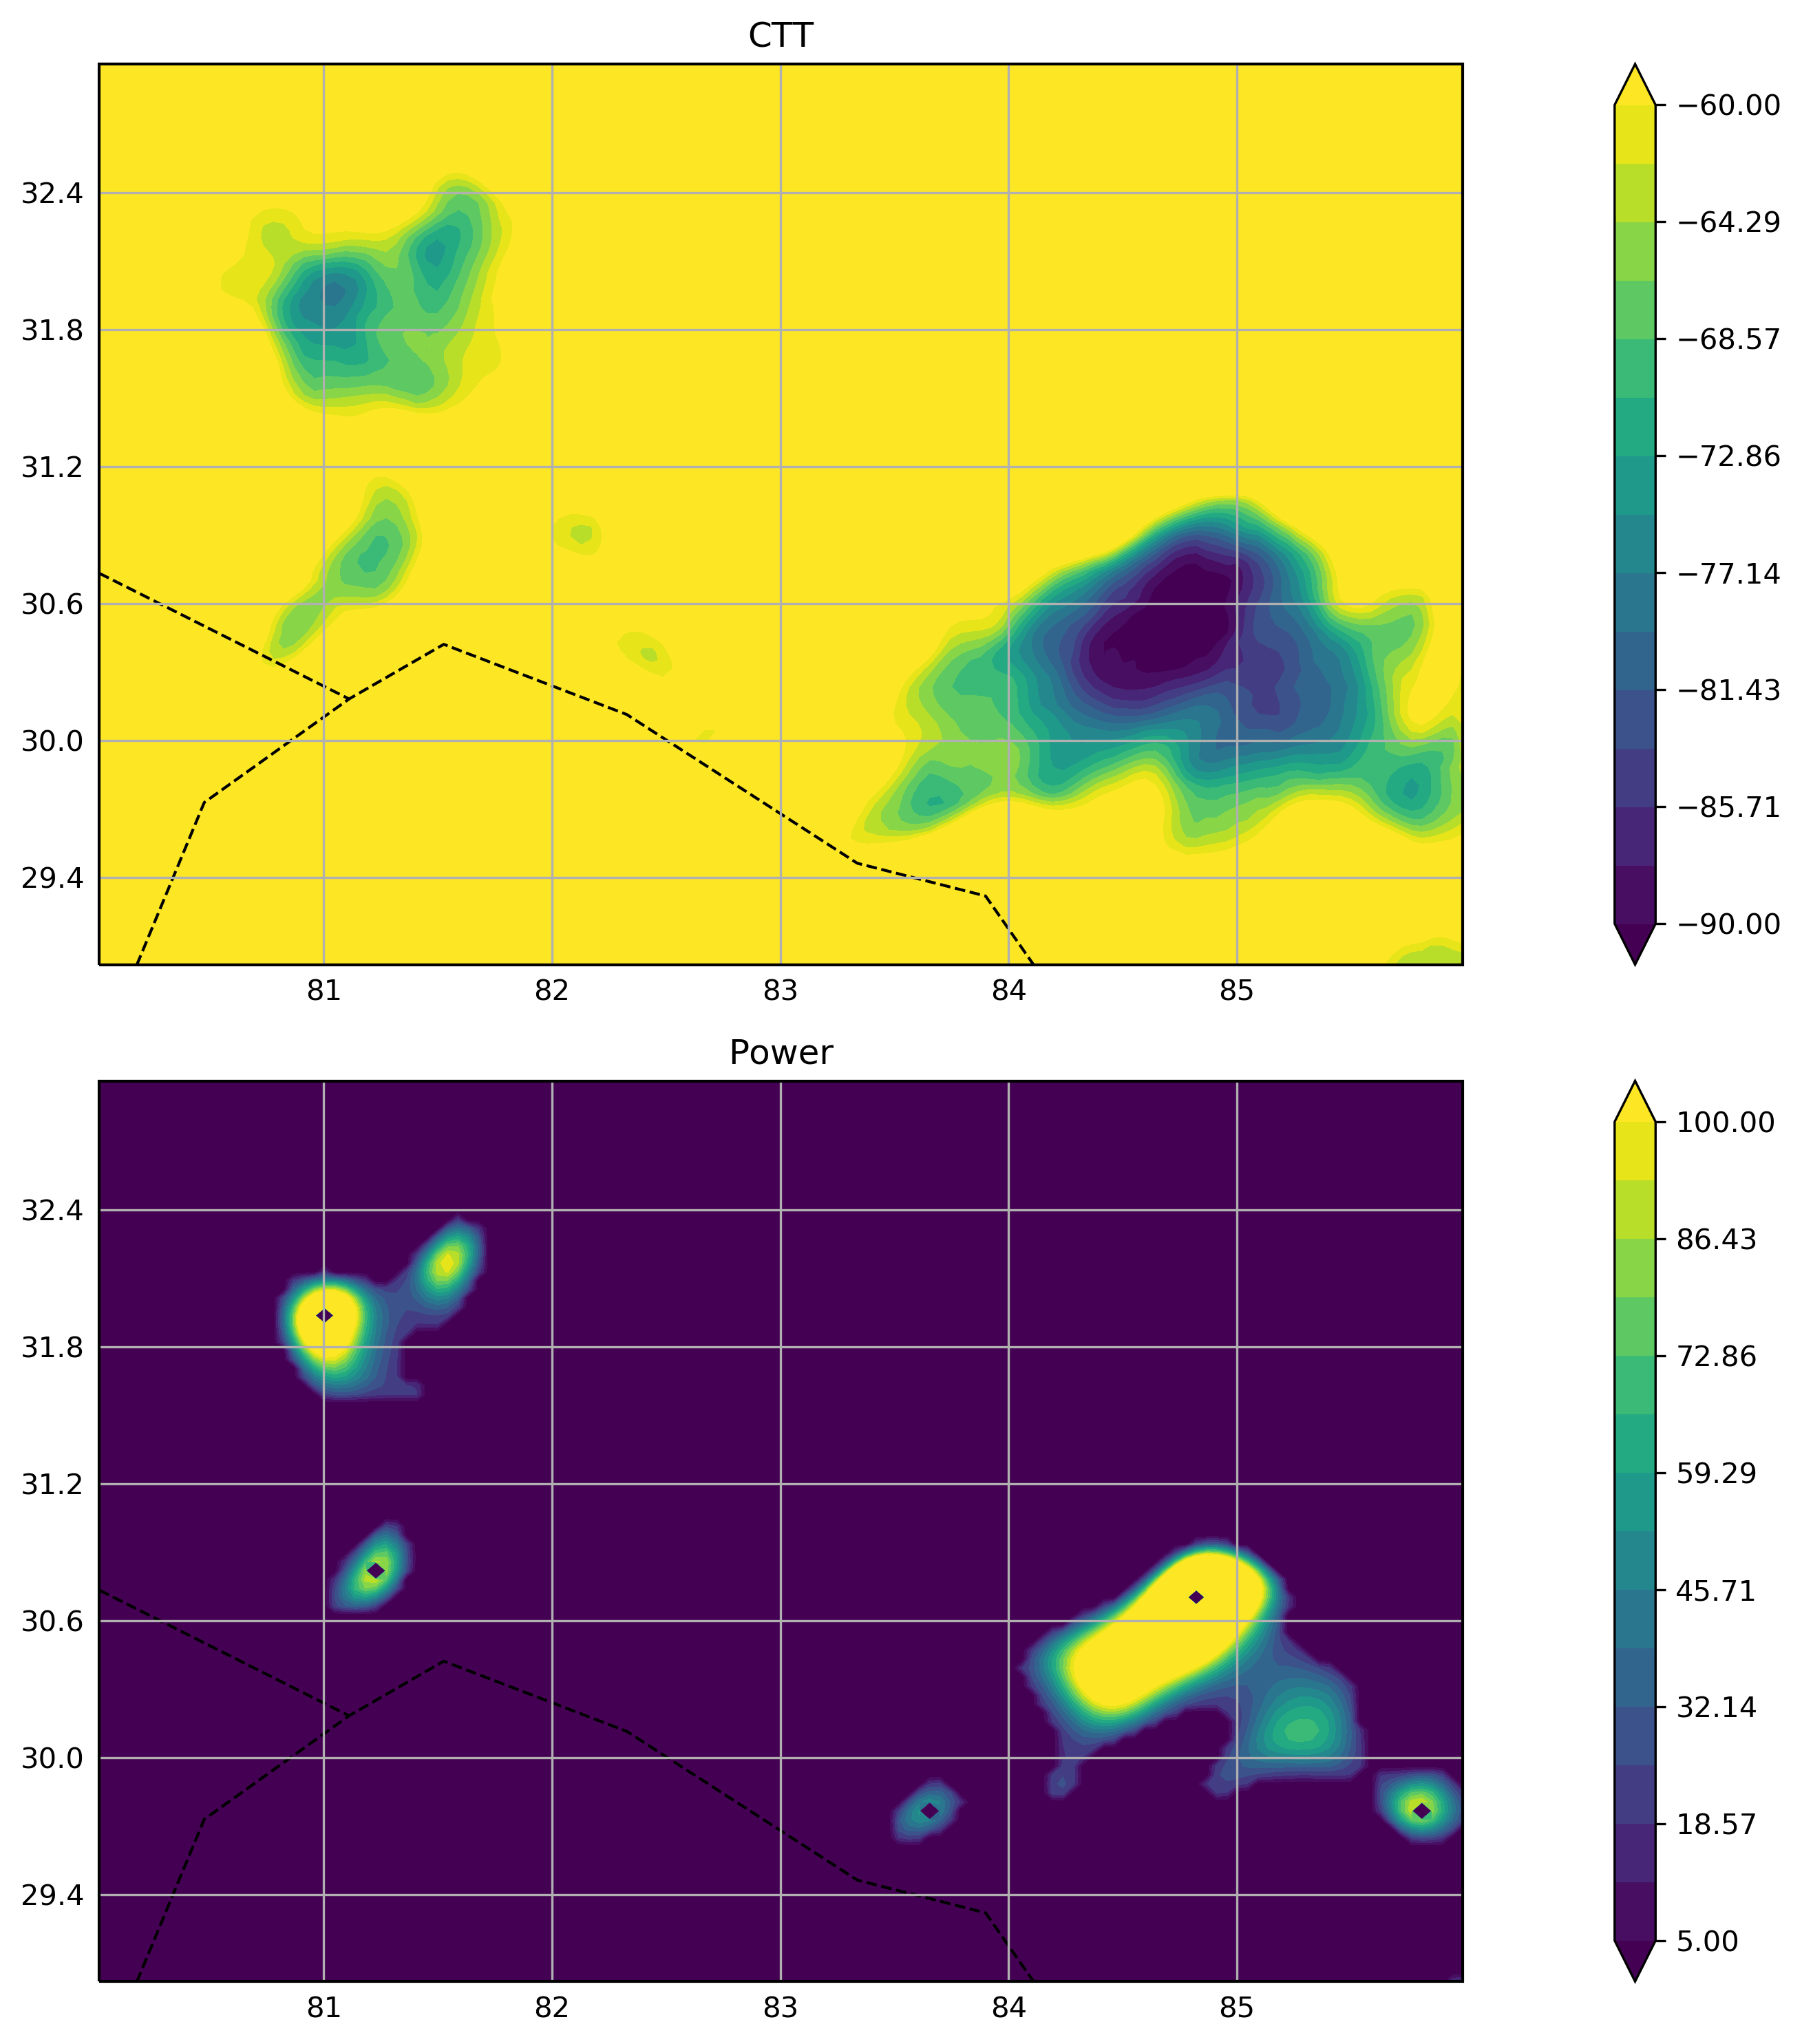

In [178]:
f=plt.figure(figsize=(15,10), dpi=300)
ax = f.add_subplot(211, projection=ccrs.PlateCarree())
draw_map(ax, fy_cut['CTT'].values/100, fy_cut['lat'], fy_cut['lon'], levels=np.linspace(-90,-60,15),
        title='CTT')
ax = f.add_subplot(212, projection=ccrs.PlateCarree())
draw_map(ax,fy_cut['blobs'].values, fy_cut['lat'], fy_cut['lon'], levels=np.linspace(5,100,15), 
         title='Power')
f.canvas.draw() 
plt.tight_layout()

# MSG example from the Sahel, compare storm detail - Analysed scales are 25-50km 

In [ ]:
ms_cut = msg_ds.sel(lon=slice(9,12.5), lat=slice(9,11))

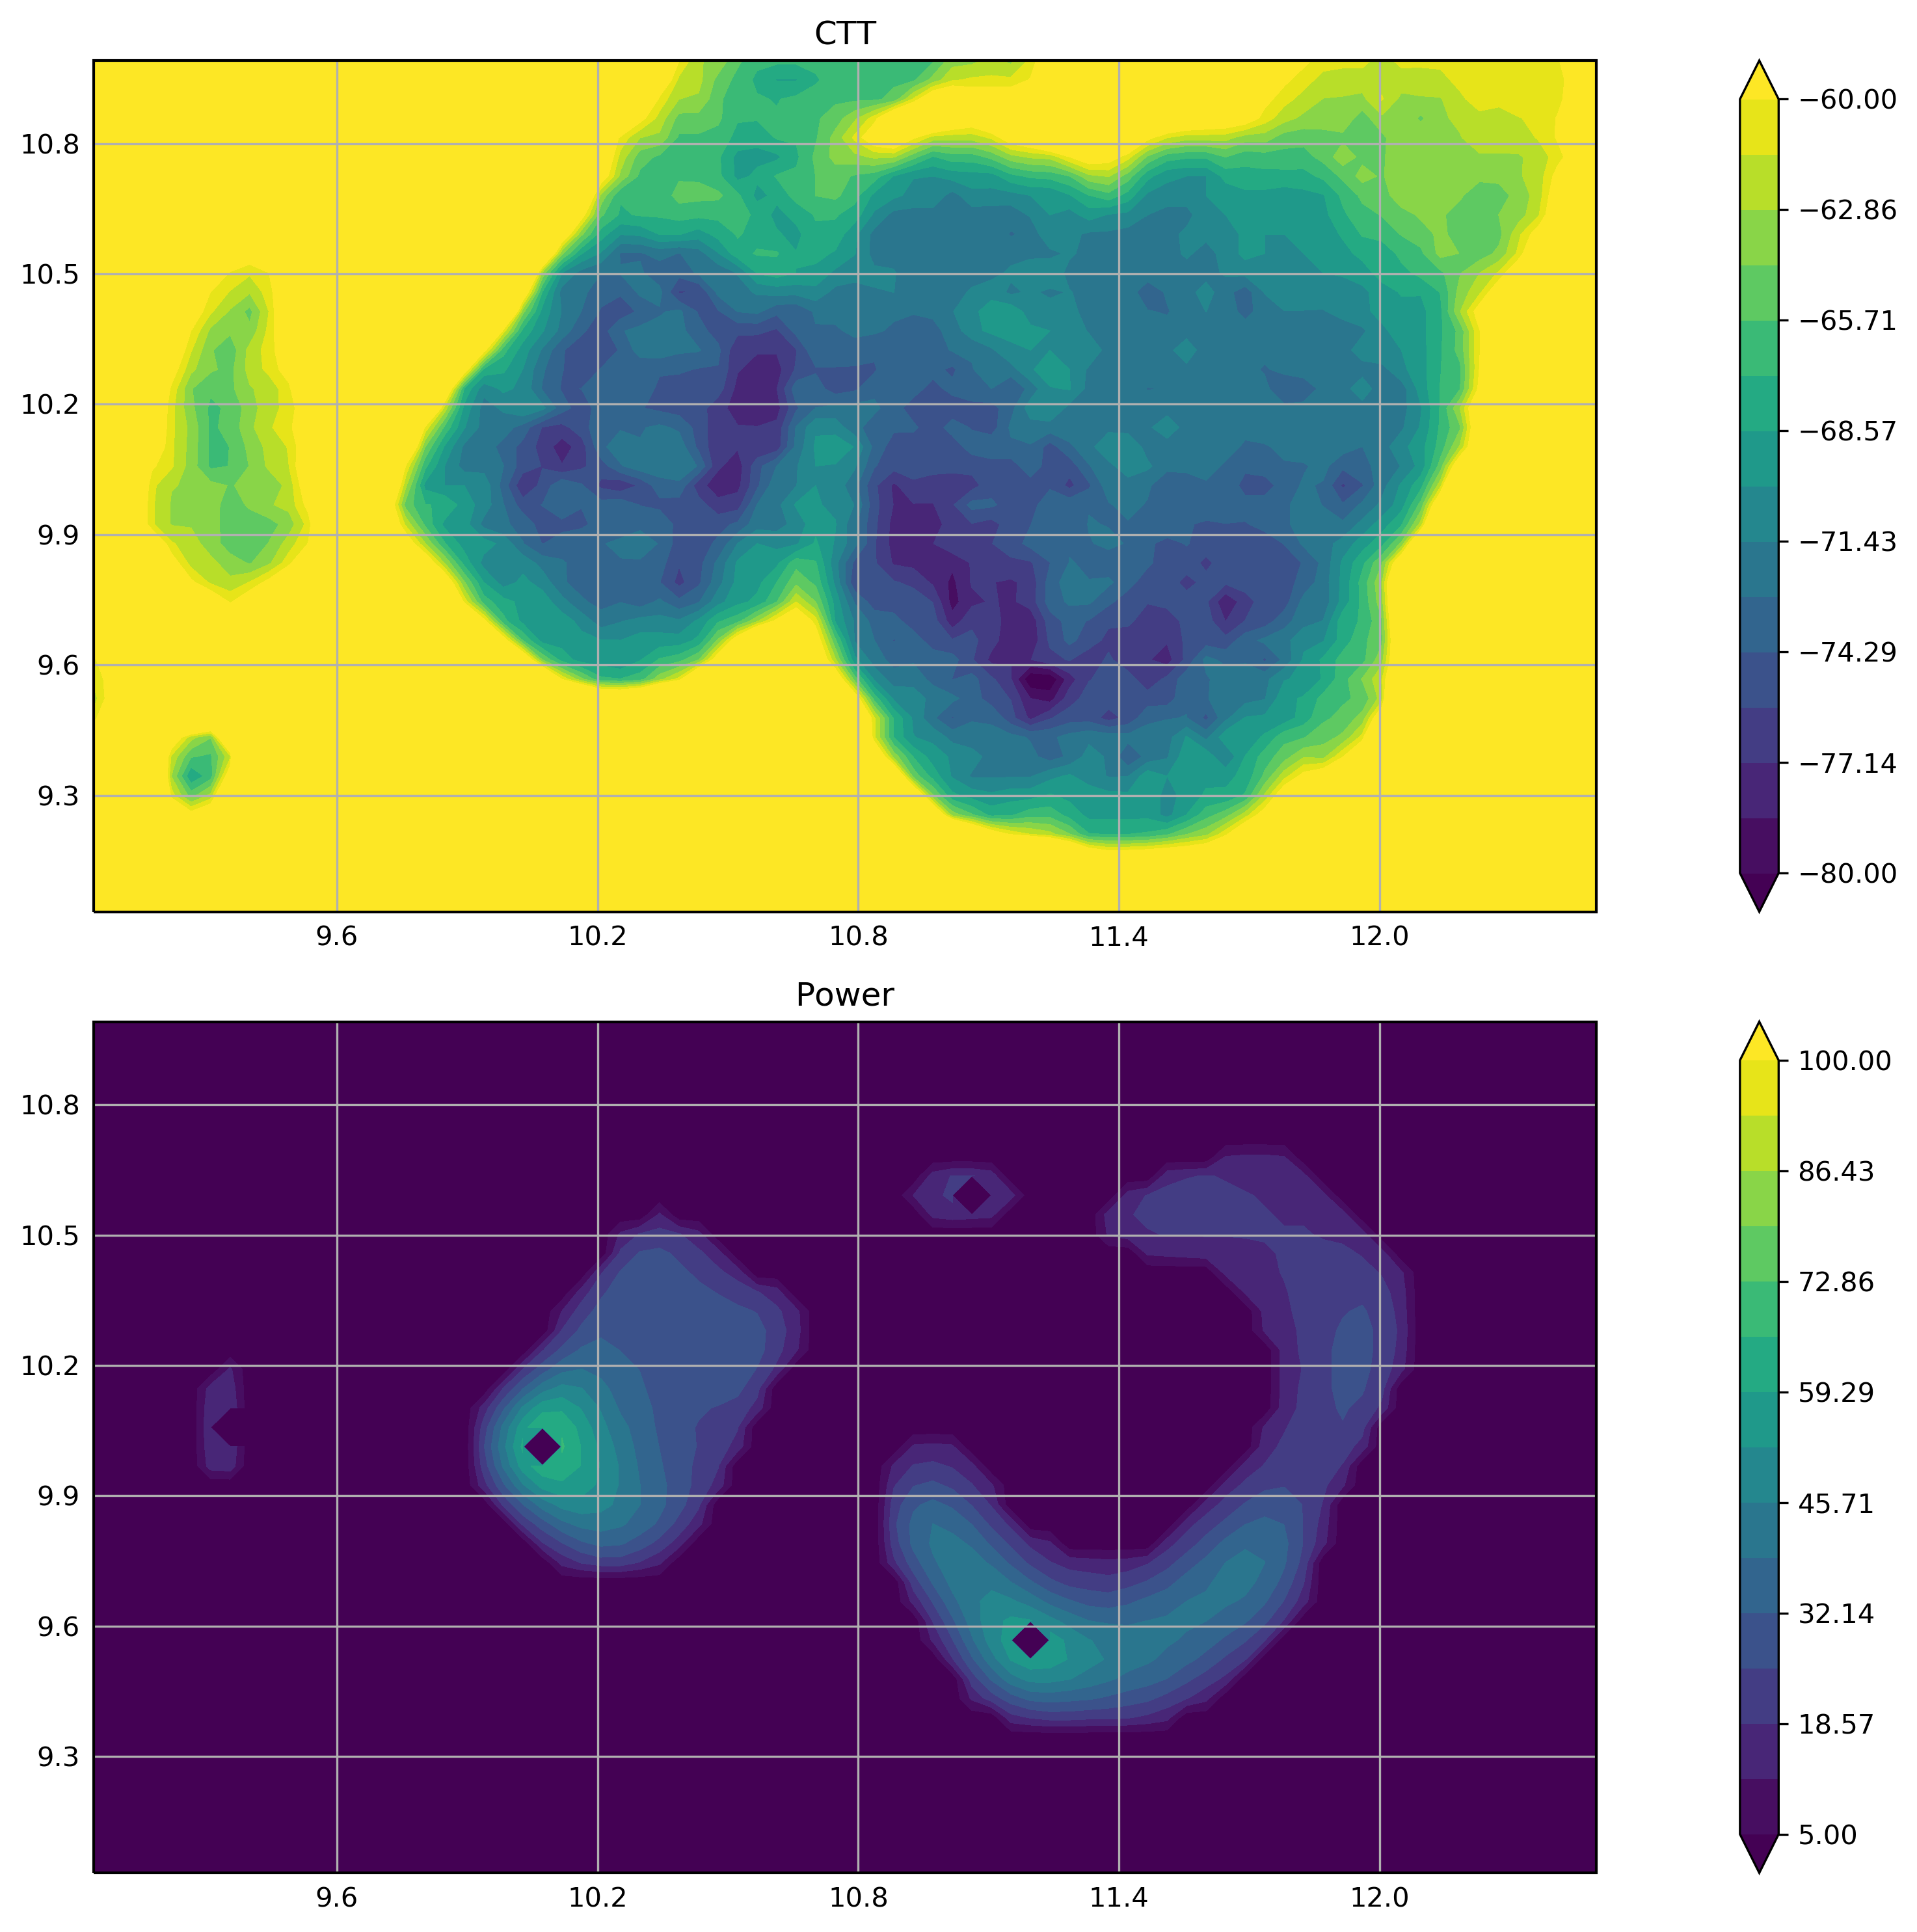

In [137]:
day=180
f=plt.figure(figsize=(15,10), dpi=300)
ax = f.add_subplot(211, projection=ccrs.PlateCarree())
draw_map(ax,ms_cut['tir'][day,:,:].values/100, ms_cut['lat'], ms_cut['lon'], levels=np.linspace(-80,-60,15),
        title='CTT')
ax = f.add_subplot(212, projection=ccrs.PlateCarree())
draw_map(ax,ms_cut['blobs'][day,:,:].values, ms_cut['lat'], ms_cut['lon'], levels=np.linspace(5,100,15), 
         title='Power')
f.canvas.draw() 
plt.tight_layout()

In [131]:
msg_ds.time[180]

<xarray.DataArray 'time' ()>
array('1994-06-04T18:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1994-06-04T18:30:00